# Trusted Newton-Verfahren

__Manfred Brill, Hochschule Kaiserslautern__

## Vorbemerkungen
In SciPy gibt es die Funktion *optimize.minimize*, die verschiedene Algorithmen für die Näherung eines lokalen Minimums eines skalaren Felds anbietet. Wir verwenden eine quadratische Form als Zielfunkion und den Trusted Newton-Algorithmus für die Optimierung. Diese Methode benötigt die Zielfunktion und eine Funktion, die den Gradienten berechnet.

## Ein Beispiel
Wir implementieren die quadratische Form als Zielfunktion f. Da wir die Gradienten der quadratischen Form benötigen implementieren wir auch gleich Funktionen, die den Gradienten und die Hesse-Matrix zurückgibt. Wir verwenden Konturlinien und erzeugen damit eine grafische Ausgabe der quadratischen Form. Hier erkennen wir bereits sehr gut, dass das gesuchte lokale Minimum im Ursprung liegt. Wir markieren dieses lokale Minimum mit einem Stern. Als Startpunkt verwenden wir (1/2, 1/3), den wir gleich in die grafische Darstellung eintragen.

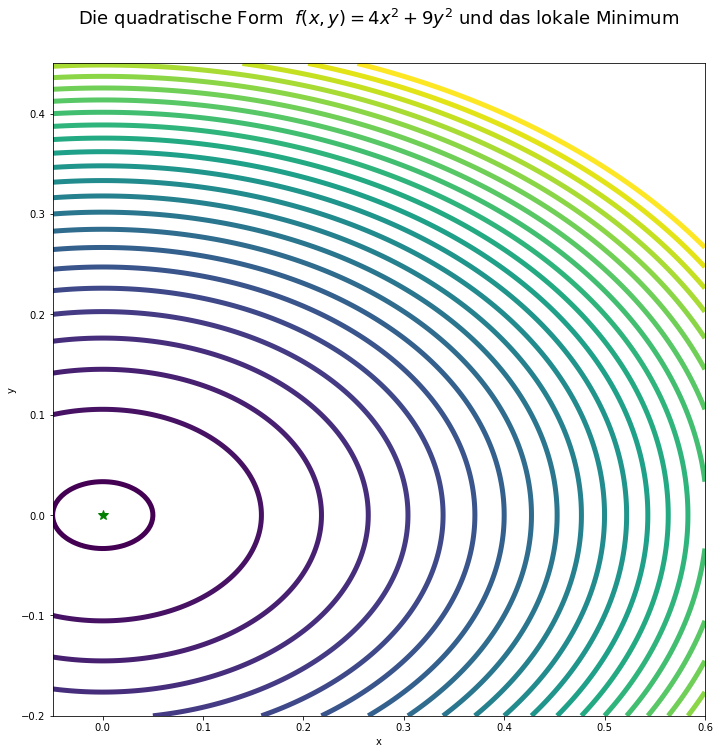

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    """
    Zielfunktion
    """
    return 4.0*x[0]*x[0] + 9.0*x[1]*x[1]


def gradient(x):
    """
    Gradient der Zielfunktion
    """
    return np.array([8.0*x[0], 18.0*x[1]])


xc = np.zeros(shape=(2,))
x0 = np.array([0.5, 1.0/3.0])

xmin = -0.05
xmax = 0.6
ymin = -0.2
ymax = 0.45

x = np.linspace(xmin, xmax, 200)
y = np.linspace(ymin, ymax, 200)
x, y = np.meshgrid(x, y)
z = f(np.array([x, y]))

Cmin = 0.01
Cmax = 2.1
Cstep = 0.09
levels = np.arange(Cmin, Cmax, Cstep)

fig = plt.figure(figsize=(12.0, 12.0))
ax = fig.add_subplot(111)
ax.set_aspect('equal')
cplot = plt.contour(x, y, z,
                    levels=levels,
                    linewidths=5,
                    extent=(xmin, xmax, -ymin, ymax))
plt.plot(xc[0], xc[1], 'g*', markersize=10)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Die quadratische Form  $f(x, y) = 4 x^2 +  9 y^2$ und das lokale Minimum',
          y=1.05, fontsize=18)
plt.show()

## Visualisierungen
Wir rufen die Funktion *optimize.minimize* mit dem Argument *methodnewton-cg* auf und erstellen Ausgaben auf der Konsole.
SciPy bietet die Möglichkeit eine Callback-Funktion zu übergeben, die nach jeder Iteration aufgerufen wird. Das nutzen wir aus und implementieren eine Funktion, die in einer Liste am Ende die Koordinaten der berechneten Näherungen enthält. Wir verwenden eine Liste, da wir ja vorher nicht wissen wie viele Iterationen durchgeführt werden. Nach dem Aufruf des Verfahrens wandeln wir die Liste in ein NumPy-Array um.
Dieses Array können wir anschließend verwenden um den Verlauf des jeweiligen Verfahrens zu visualisieren und die Verfahren auch zu vergleichen.

In [2]:
def make_minimize_cb(path=[]):
    """
    Callback-Funktion für die Visualisierung der Optimierungsverfahren
    """
    def minimize_cb(xk):
        path.append(np.copy(xk))

    return minimize_cb

Jetzt sind wir vorbereitet und führen das diskrete Newton-Verfahren aus. Wir lassen beim Aufruf die Angabe der Funktion, die die Hesse-Matrix berechnet weg.  

In [3]:
from scipy import optimize

result = optimize.minimize(f, 
                           x0,
                           method='tnc',
                           jac=gradient,
                           options={
                               'maxiter': 100,
                               'xtol': 1e-5,
                               'disp': False}
)

if result.success:
    print('Der berechnete Punkt des lokalen Minimums:')
    print(result.x)
    print('Der Funktionswert an diesem Punkt:', result.fun)
    print(result.nit, 'Iterationen')

Der berechnete Punkt des lokalen Minimums:
[1.63988711e-10 6.26319552e-11]
Der Funktionswert an diesem Punkt: 1.4287404628093762e-19
2 Iterationen


Wir benötigen 2 Iterationen, das lokale Minimum wird bis auf Rundungsfehler erreicht.

Wie schon erwähnt können wir eine Callback-Funktion übergeben, die nach jedem Iterationsschritt aufgerufen werden. Möglich wäre *callback=print*, dann erhalten wir nach jeder Iteration die Koordinaten der aktuellen Näherung. Da Nelder-Mead jedoch wie angegeben 44 Iterationen durchführt verzichten wir auf diese Möglichkeit und verwenden unsere Callback-Funktion, die wir bereits implementiert haben. Wir vereinbaren die Liste und fügen den Startpunkt hinzu. Dann rufen wir das Verfahren auf und wandeln die Liste anschließend in ein NumPy-Array um. 

In [4]:
path_ = [x0]

result = optimize.minimize(f, 
                           x0,
                           method='tnc',
                           jac=gradient,
                           callback=make_minimize_cb(path_),
                           options={
                               'maxiter': 100,
                               'xtol': 1e-5,
                               'disp': False}
)

if result.success:
    path = np.array(path_).T

Jetzt verwenden wir die Funktion *quiver* und geben die einzelnen Punkte der Näherung aus und verbinden sie mit Pfeilen.

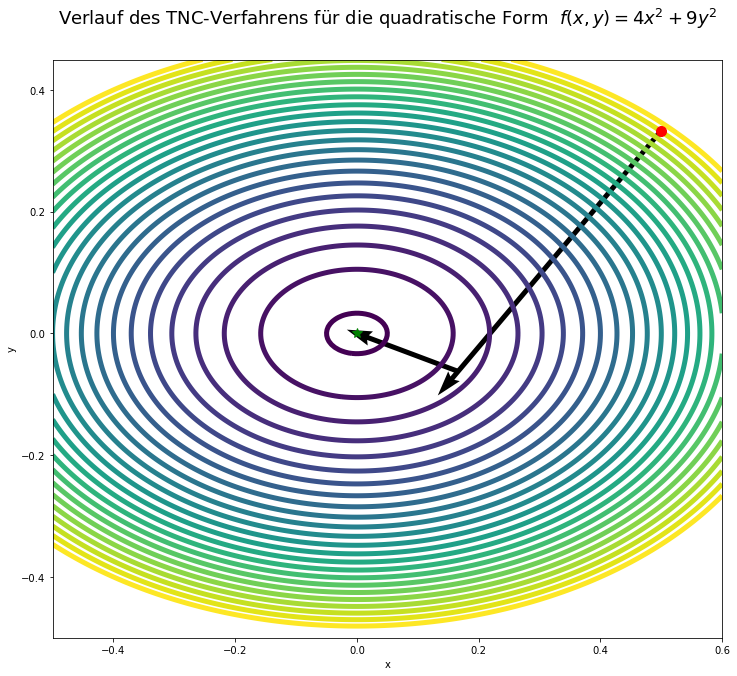

In [5]:
from matplotlib import cm

index = np.linspace(0, 43, 1)

xmin = -0.5
xmax = 0.6
ymin = -0.5
ymax = 0.45

x = np.linspace(xmin, xmax, 200)
y = np.linspace(ymin, ymax, 200)
x, y = np.meshgrid(x, y)
z = f(np.array([x, y]))

fig = plt.figure(figsize=(12.0, 12.0))
ax = fig.add_subplot(111)
ax.set_aspect('equal')
          
ax.quiver(path[0,:-1], path[1,:-1], path[0,1:]-path[0,:-1], path[1,1:]-path[1,:-1], 
          scale=1.0, 
          color='k')

cplot = ax.contour(x, y, z,
                   levels=levels,
                   linewidths=5,
                   extent=(xmin, xmax, -ymin, ymax))


ax.plot(xc[0], xc[1], 'g*', markersize=10)
ax.plot(x0[0], x0[1], 'ro', markersize=10)

ax.set_xlabel('x')
ax.set_ylabel('y')
#ax.set_xlim((xmin, xmax))
#ax.set_ylim((ymin, ymax))
plt.title('Verlauf des TNC-Verfahrens für die quadratische Form  $f(x, y) = 4 x^2 +  9 y^2$',
          y=1.05, fontsize=18)
plt.show()